<a href="https://colab.research.google.com/github/Juny2312/Analysis-health/blob/main/Calorie_Regression_by_juny2312___fst_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data/test.csv')
ss = pd.read_csv('/content/drive/MyDrive/data/sample_submission.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
from mysql import connector
import streamlit as st
import numpy as np
import seaborn as sbs
from matplotlib import pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
test.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67


In [ ]:
train.head()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,166.0
1,TRAIN_0001,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,33.0
2,TRAIN_0002,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,23.0
3,TRAIN_0003,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,91.0
4,TRAIN_0004,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,32.0


In [ ]:
train.isna()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
import os
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [ ]:
import matplotlib.gridspec as gridspec
from wordcloud import WordCloud, STOPWORDS
plt.style.use('seaborn')
sbs.set_style('whitegrid')
%matplotlib inline

In [ ]:
train.isnull().sum()

ID                          0
Exercise_Duration           0
Body_Temperature(F)         0
BPM                         0
Height(Feet)                0
Height(Remainder_Inches)    0
Weight(lb)                  0
Weight_Status               0
Gender                      0
Age                         0
Calories_Burned             0
dtype: int64

In [ ]:
train.sort_values(by=['Exercise_Duration'])

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
3780,TRAIN_3780,1.0,100.2,91.0,5.0,8.0,174.2,Overweight,M,60,5.0
1545,TRAIN_1545,1.0,99.5,75.0,5.0,12.0,178.6,Normal Weight,M,20,1.0
7476,TRAIN_7476,1.0,99.3,82.0,6.0,6.0,213.8,Normal Weight,M,37,3.0
5017,TRAIN_5017,1.0,99.5,84.0,5.0,2.0,132.3,Normal Weight,F,68,4.0
5916,TRAIN_5916,1.0,99.9,77.0,6.0,2.0,196.2,Overweight,M,38,2.0
...,...,...,...,...,...,...,...,...,...,...,...
859,TRAIN_0859,30.0,105.6,104.0,4.0,8.0,114.6,Overweight,F,30,182.0
5291,TRAIN_5291,30.0,105.4,102.0,5.0,7.0,160.9,Overweight,F,68,187.0
5294,TRAIN_5294,30.0,105.6,104.0,6.0,0.0,183.0,Normal Weight,M,38,184.0
1064,TRAIN_1064,30.0,105.3,115.0,6.0,2.0,207.2,Overweight,M,27,225.0


In [ ]:
label1 = train[['Exercise_Duration','Calories_Burned']]

In [ ]:
label1

,Exercise_Duration,Calories_Burned
0,26.0,166.0
1,7.0,33.0
2,7.0,23.0
3,17.0,91.0
4,9.0,32.0
...,...,...
7495,22.0,151.0
7496,20.0,114.0
7497,8.0,41.0
7498,12.0,57.0


In [ ]:
label1.sort_values(by=['Exercise_Duration']) # Handling Categorical Data

,Exercise_Duration,Calories_Burned
3780,1.0,5.0
1545,1.0,1.0
7476,1.0,3.0
5017,1.0,4.0
5916,1.0,2.0
...,...,...
859,30.0,182.0
5291,30.0,187.0
5294,30.0,184.0
1064,30.0,225.0


In [ ]:
cor = label1.copy().corr() #['Calories_Burned'] 0 < p < 1 represents proportional relationship.

In [ ]:
cor # Calorie Consumption and Physical momentum are propotional

,Exercise_Duration,Calories_Burned
Exercise_Duration,1.000000,0.954783
Calories_Burned,0.954783,1.000000


In [ ]:
cor_pear = label1.copy().corr(method='pearson') #['Calories_Burned']

In [ ]:
cor_pear

,Exercise_Duration,Calories_Burned
Exercise_Duration,1.000000,0.954783
Calories_Burned,0.954783,1.000000


In [ ]:
# y : Calorie Consumption
# X(x1,x2,x3,...) : bio

In [ ]:
label2 = train[['Body_Temperature(F)','BPM',	'Height(Feet)','Height(Remainder_Inches)','Weight(lb)','Weight_Status','Gender','Age']]

In [ ]:
label2

,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45
1,103.3,88.0,6.0,6.0,224.9,Overweight,M,50
2,103.3,86.0,6.0,3.0,218.3,Overweight,M,29
3,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33
4,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38
...,...,...,...,...,...,...,...,...
7495,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75
7496,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21
7497,103.1,90.0,6.0,2.0,202.8,Overweight,M,57
7498,104.4,97.0,5.0,9.0,167.6,Overweight,M,35


In [ ]:
label3 = train[['Exercise_Duration','Body_Temperature(F)','BPM',	'Height(Feet)','Height(Remainder_Inches)','Weight(lb)','Weight_Status','Gender','Age']]

In [ ]:
label3

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38
...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35


In [ ]:
label4 = train['Calories_Burned']

In [ ]:
label4

0       166.0
1        33.0
2        23.0
3        91.0
4        32.0
        ...  
7495    151.0
7496    114.0
7497     41.0
7498     57.0
7499     59.0
Name: Calories_Burned, Length: 7500, dtype: float64

In [ ]:
label3.drop_duplicates(['Weight_Status'], keep='first')

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50
23,8.0,103.5,96.0,5.0,3.0,138.9,Obese,F,34


In [ ]:
categorize = pd.get_dummies(label3['Weight_Status'])

In [ ]:
categorize

,Normal Weight,Obese,Overweight
0,1,0,0
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7495,1,0,0
7496,1,0,0
7497,0,0,1
7498,0,0,1


In [ ]:
categorize2 = pd.get_dummies(label3['Gender'])

In [ ]:
categorize2

,F,M
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
7495,1,0
7496,1,0
7497,0,1
7498,0,1


In [ ]:
new_test = pd.concat([test, categorize],axis=1)   #

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45,1,0,0
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21,0,0,1
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58,0,0,1
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35,1,0,0
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,Normal Weight,M,51,1,0,0
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,Overweight,M,25,1,0,0
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,Normal Weight,F,42,0,0,1
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,Normal Weight,F,48,0,0,1


In [ ]:
new_label3 = pd.concat([label3, categorize],axis=1)

In [ ]:
new_label3

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,1,0,0
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,0,0,1
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,0,0,1
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,1,0,0
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,1,0,0
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,1,0,0
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,0,0,1
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,0,0,1


In [ ]:
new_test = pd.concat([new_test, categorize2],axis=1)   #

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,Normal Weight,F,45,1,0,0,1,0
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,Overweight,M,21,0,0,1,0,1
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,Normal Weight,M,58,0,0,1,0,1
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,Overweight,M,35,1,0,0,1,0
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,Normal Weight,F,67,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,Normal Weight,M,51,1,0,0,1,0
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,Overweight,M,25,1,0,0,1,0
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,Normal Weight,F,42,0,0,1,0,1
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,Normal Weight,F,48,0,0,1,0,1


In [ ]:
new_label3_2 = pd.concat([new_label3, categorize2],axis=1)

In [ ]:
new_label3_2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,F,45,1,0,0,1,0
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,M,50,0,0,1,0,1
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,M,29,0,0,1,0,1
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,F,33,1,0,0,1,0
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,M,38,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,F,75,1,0,0,1,0
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,F,21,1,0,0,1,0
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,M,57,0,0,1,0,1
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,M,35,0,0,1,0,1


In [ ]:
new_label3_2.drop(['Weight_Status'],axis=1)


,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,26.0,105.6,107.0,5.0,9.0,154.3,0,45,1,0,0,1,0,1.4,36.4,0.000000,20.758948,0.000000,539.732658
1,7.0,103.3,88.0,6.0,6.0,224.9,1,50,0,0,1,0,1,1.4,9.8,13.197280,0.000000,92.380961,0.000000
2,7.0,103.3,86.0,6.0,3.0,218.3,1,29,0,0,1,0,1,1.4,9.8,11.569751,0.000000,80.988260,0.000000
3,17.0,104.0,99.0,5.0,6.0,147.7,0,33,1,0,0,1,0,1.4,23.8,0.000000,18.660554,0.000000,317.229426
4,9.0,102.7,88.0,5.0,10.0,169.8,1,38,1,0,0,0,1,1.4,12.6,10.000750,0.000000,90.006754,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,0,75,1,0,0,1,0,1.4,30.8,0.000000,19.761955,0.000000,434.763011
7496,20.0,105.3,104.0,5.0,8.0,147.7,0,21,1,0,0,1,0,1.4,28.0,0.000000,18.836009,0.000000,376.720172
7497,8.0,103.1,90.0,6.0,2.0,202.8,1,57,0,0,1,0,1,1.4,11.2,12.786243,0.000000,102.289943,0.000000
7498,12.0,104.4,97.0,5.0,9.0,167.6,1,35,0,0,1,0,1,1.4,16.8,11.108695,0.000000,133.304340,0.000000


In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0.000000,18.872629,0.000000,490.688356
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,14.008274,0.000000,406.239957,0.000000
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,11.266477,0.000000,123.931248,0.000000
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0.000000,21.061415,0.000000,505.473958
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,14.570784,0.000000,422.552734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0.000000,21.750425,0.000000,609.011912
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0.000000,20.706095,0.000000,82.824379
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,9.664359,0.000000,231.944627,0.000000
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,8.051625,0.000000,64.413002,0.000000


In [ ]:
#new_label3 # Gender 0,1 Binary Column Created

In [ ]:
new_label3_2['Gender'] = pd.get_dummies(new_label3_2['Gender'], prefix_sep='_', drop_first=True)
new_label3_2.head() # Whole Column to train
new_test['Gender'] = pd.get_dummies(new_test['Gender'], prefix_sep='_', drop_first=True)

In [ ]:
#new_label3_2 = new_label3_2.drop(['Weight_Status'],axis=1)

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0.000000,18.872629,0.000000,490.688356
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,14.008274,0.000000,406.239957,0.000000
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,11.266477,0.000000,123.931248,0.000000
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0.000000,21.061415,0.000000,505.473958
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,14.570784,0.000000,422.552734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0.000000,21.750425,0.000000,609.011912
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0.000000,20.706095,0.000000,82.824379
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,9.664359,0.000000,231.944627,0.000000
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,8.051625,0.000000,64.413002,0.000000


In [ ]:
new_test2 = new_test.drop(['ID'],axis=1)

In [ ]:
new_test2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0.000000,18.872629,0.000000,490.688356
1,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,14.008274,0.000000,406.239957,0.000000
2,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,11.266477,0.000000,123.931248,0.000000
3,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0.000000,21.061415,0.000000,505.473958
4,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,14.570784,0.000000,422.552734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0.000000,21.750425,0.000000,609.011912
7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0.000000,20.706095,0.000000,82.824379
7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,9.664359,0.000000,231.944627,0.000000
7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,8.051625,0.000000,64.413002,0.000000


In [ ]:
#new_label3_3 # F,M : Categorizing each Coloumn

In [ ]:
cor2 = new_label3_2.copy().corr()

In [ ]:
cor2


,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M
Exercise_Duration,1.000000,0.904314,0.853489,-0.004566,0.003649,0.002236,0.007789,0.017734,-0.015655,0.005310,0.014095,-0.007789,0.007789
Body_Temperature(F),0.904314,1.000000,0.770707,0.004248,-0.003311,0.007554,0.012012,0.016474,-0.014996,0.003367,0.014090,-0.012012,0.012012
BPM,0.853489,0.770707,1.000000,0.003110,0.004244,0.012562,0.016898,0.014702,-0.023626,0.000075,0.023989,-0.016898,0.016898
Height(Feet),-0.004566,0.004248,0.003110,1.000000,-0.536675,0.821749,0.593454,0.015356,-0.355408,0.096954,0.328079,-0.593454,0.593454
Height(Remainder_Inches),0.003649,-0.003311,0.004244,-0.536675,1.000000,-0.025702,0.001421,-0.011303,0.002119,-0.005403,-0.000305,-0.001421,0.001421
Weight(lb),0.002236,0.007554,0.012562,0.821749,-0.025702,1.000000,0.779709,0.090536,-0.596259,0.111696,0.567849,-0.779709,0.779709
Gender,0.007789,0.012012,0.016898,0.593454,0.001421,0.779709,1.000000,0.006035,-0.586168,0.088348,0.565581,-1.000000,1.000000
Age,0.017734,0.016474,0.014702,0.015356,-0.011303,0.090536,0.006035,1.000000,-0.181541,0.005552,0.182628,-0.006035,0.006035
Normal Weight,-0.015655,-0.014996,-0.023626,-0.355408,0.002119,-0.596259,-0.586168,-0.181541,1.000000,-0.216016,-0.942536,0.586168,-0.586168
Obese,0.005310,0.003367,0.000075,0.096954,-0.005403,0.111696,0.088348,0.005552,-0.216016,1.000000,-0.122614,-0.088348,0.088348


<Axes: >

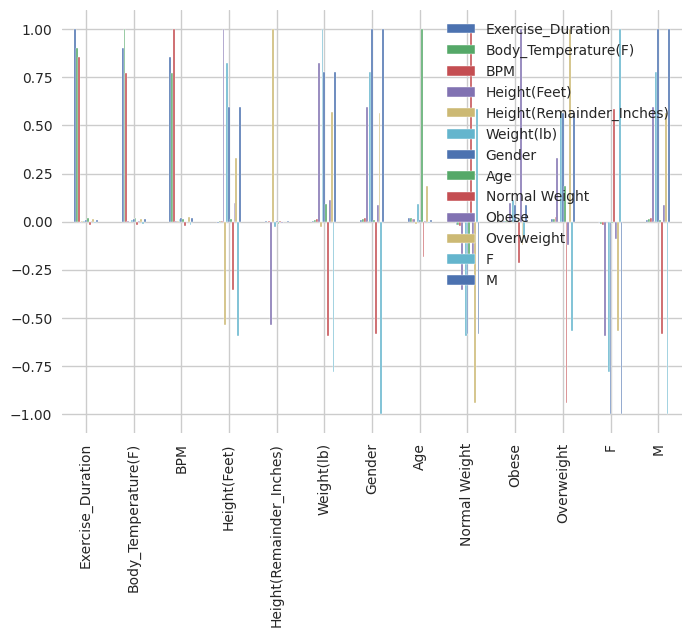

In [ ]:
cor2.plot.bar()

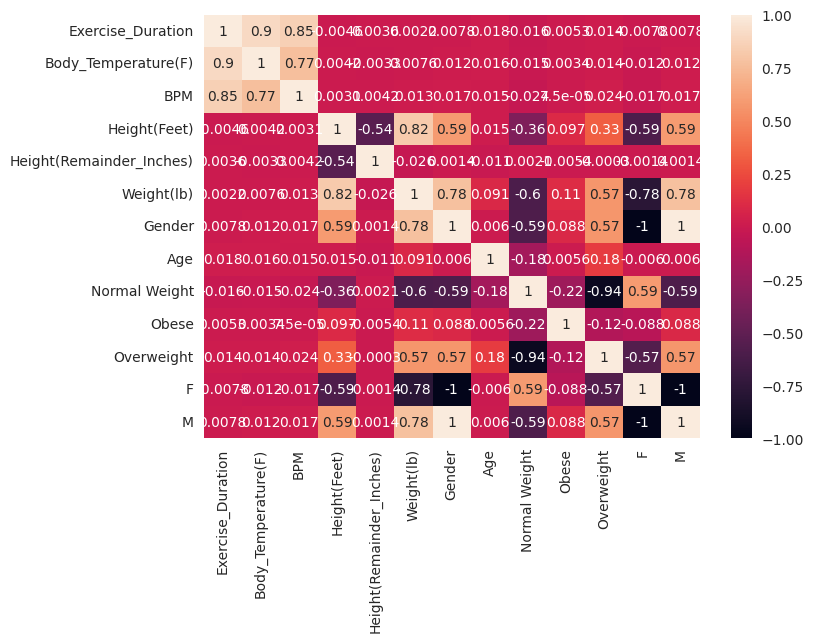

In [ ]:
ax = sbs.heatmap(cor2, annot=True)#, annot_kws=dict(color='g'), cmap='Greys')
plt.show()

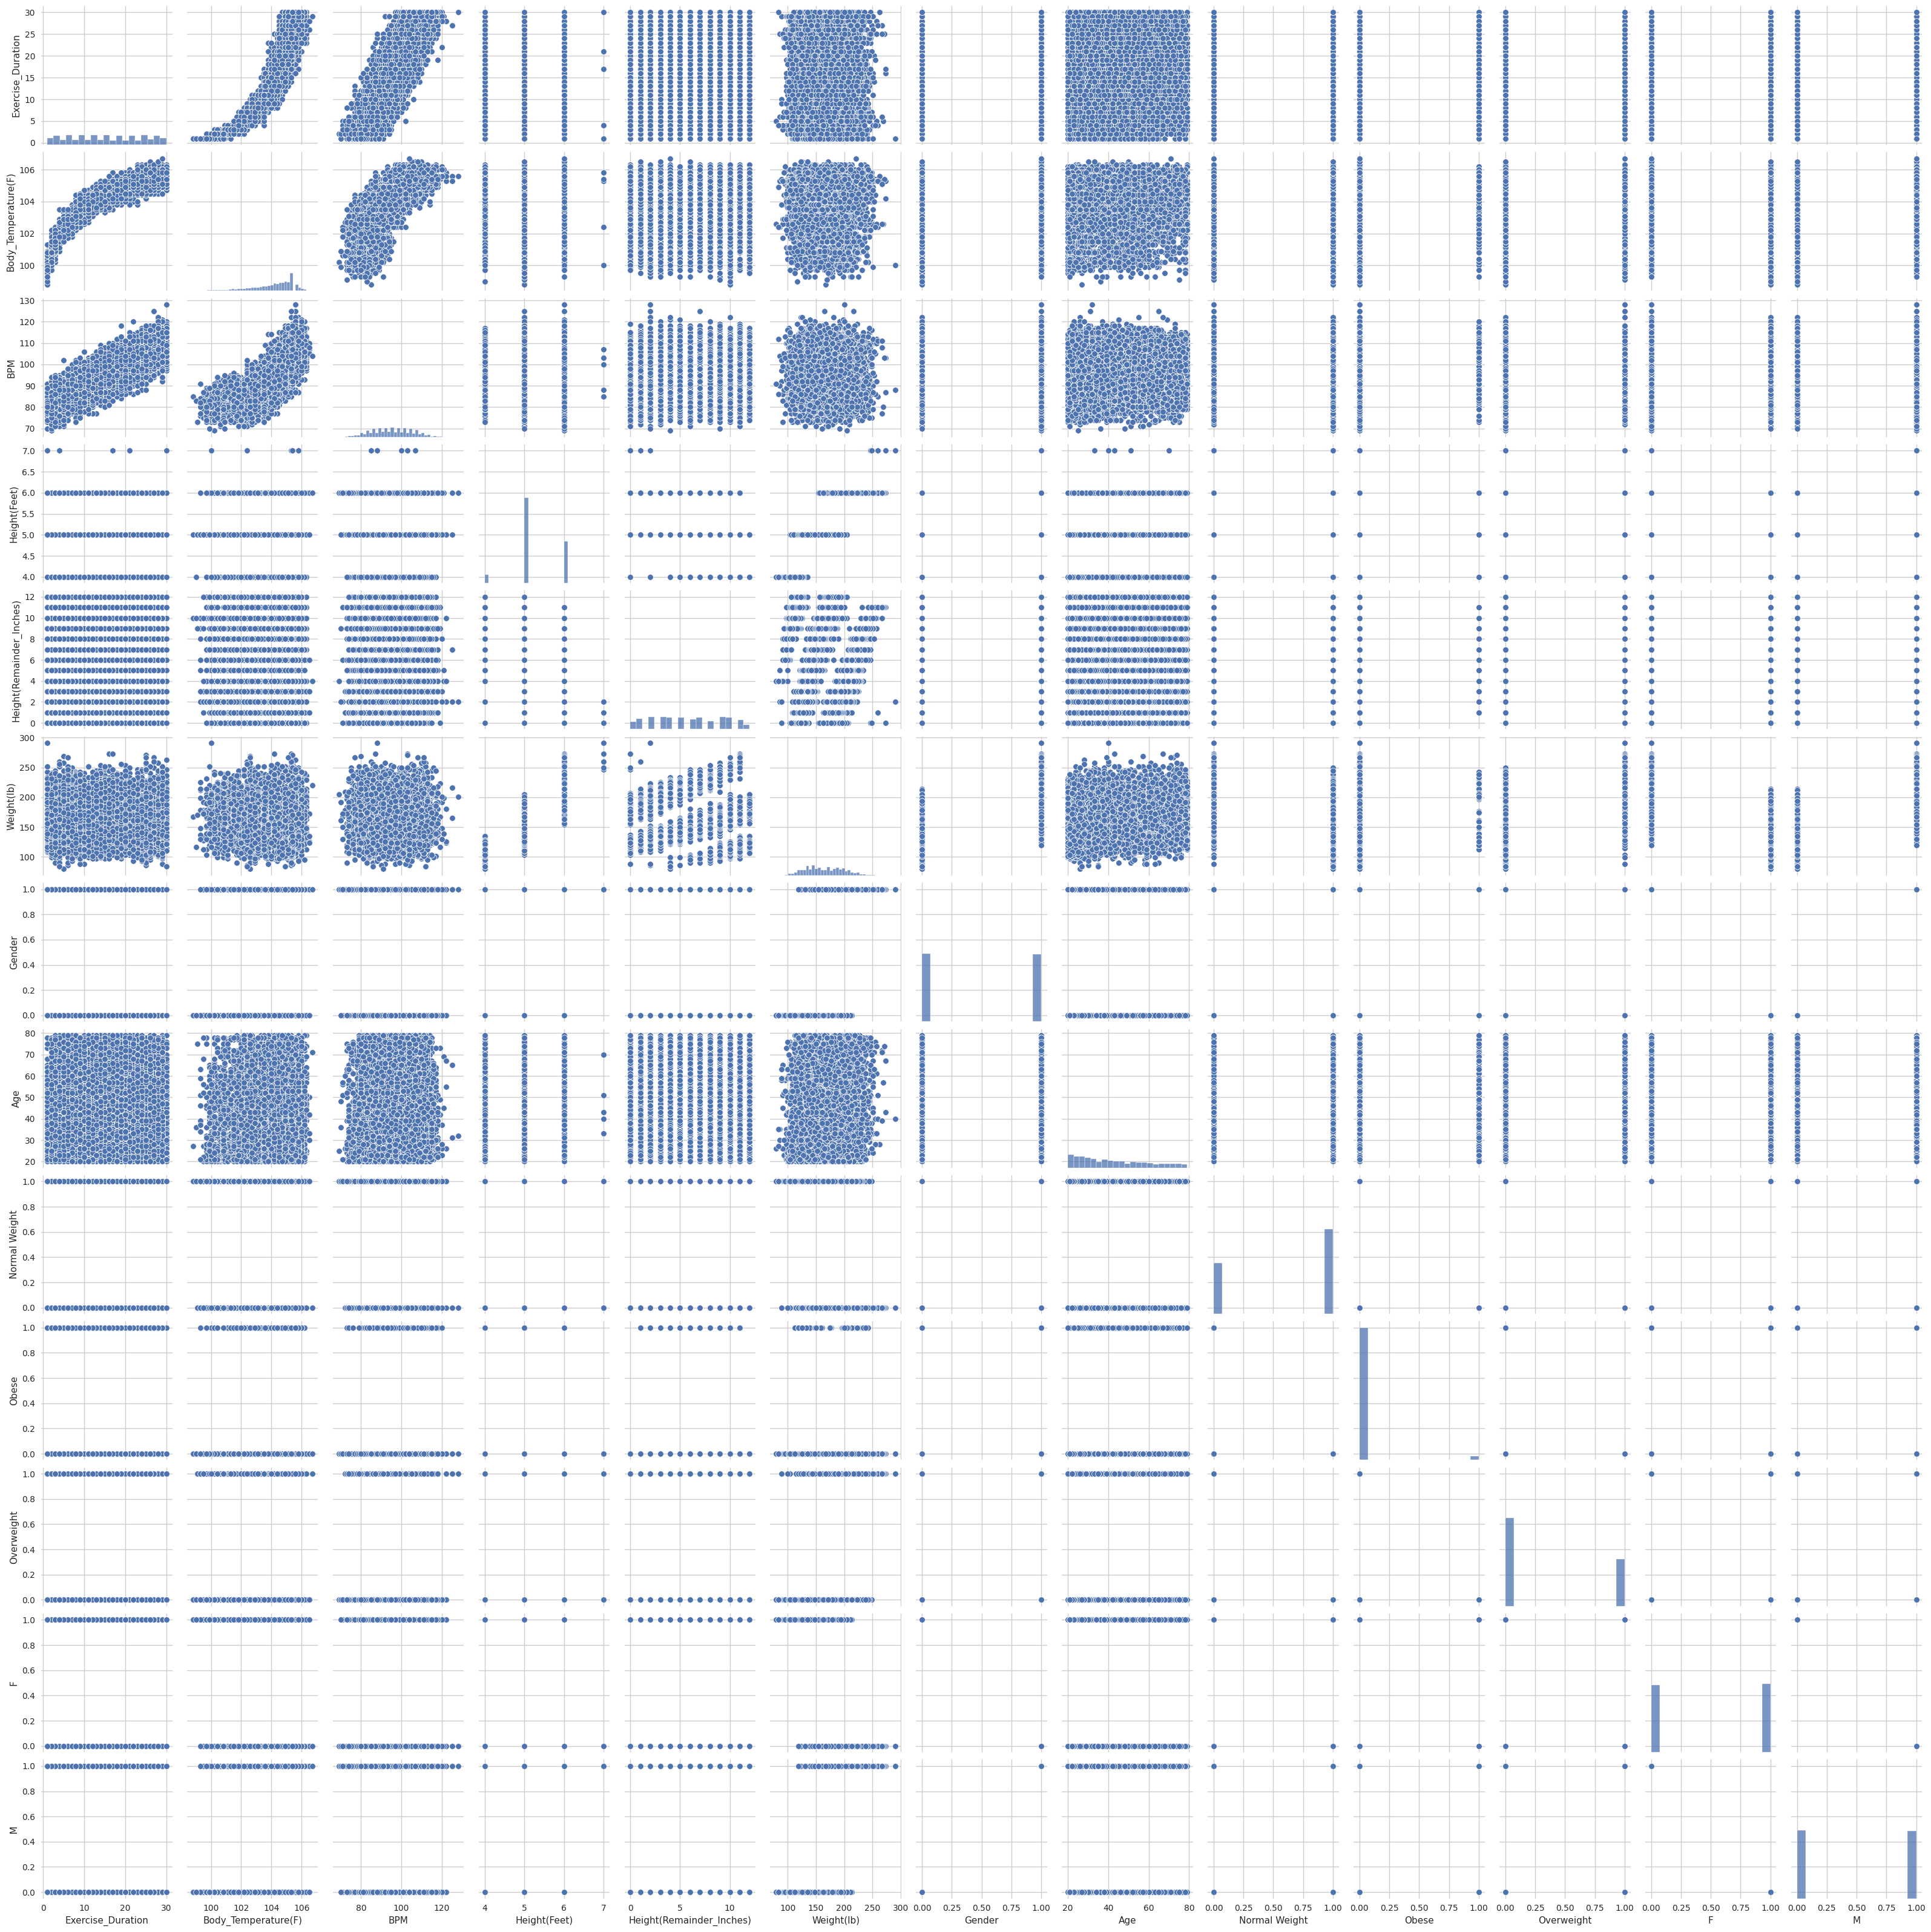

In [ ]:
fig2 = sbs.pairplot(new_label3_2)

In [ ]:
new_Range1 = new_label3_2[['Exercise_Duration','Body_Temperature(F)', 'BPM']]

In [ ]:
new_Range1

,Exercise_Duration,Body_Temperature(F),BPM
0,26.0,105.6,107.0
1,7.0,103.3,88.0
2,7.0,103.3,86.0
3,17.0,104.0,99.0
4,9.0,102.7,88.0
...,...,...,...
7495,22.0,105.1,104.0
7496,20.0,105.3,104.0
7497,8.0,103.1,90.0
7498,12.0,104.4,97.0


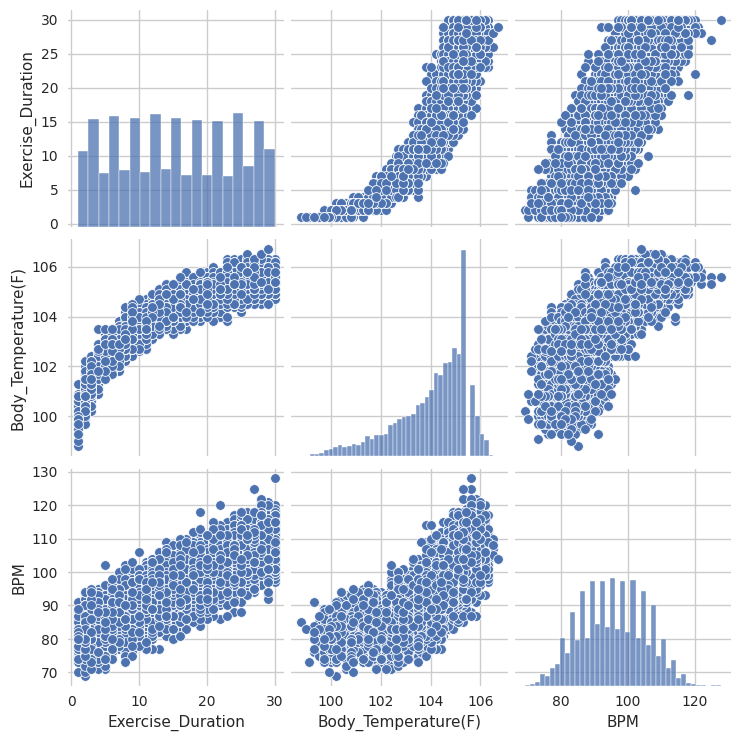

In [ ]:
fig3 = sbs.pairplot(new_Range1)

In [ ]:
new_Range2 = new_label3_2[['Height(Feet)',	'Height(Remainder_Inches)',	'Weight(lb)',	'Gender',	'Age',	'Normal Weight',	'Obese',	'Overweight',	'F',	'M']]

In [ ]:
new_Range2

,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M
0,5.0,9.0,154.3,0,45,1,0,0,1,0
1,6.0,6.0,224.9,1,50,0,0,1,0,1
2,6.0,3.0,218.3,1,29,0,0,1,0,1
3,5.0,6.0,147.7,0,33,1,0,0,1,0
4,5.0,10.0,169.8,1,38,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7495,4.0,10.0,112.4,0,75,1,0,0,1,0
7496,5.0,8.0,147.7,0,21,1,0,0,1,0
7497,6.0,2.0,202.8,1,57,0,0,1,0,1
7498,5.0,9.0,167.6,1,35,0,0,1,0,1


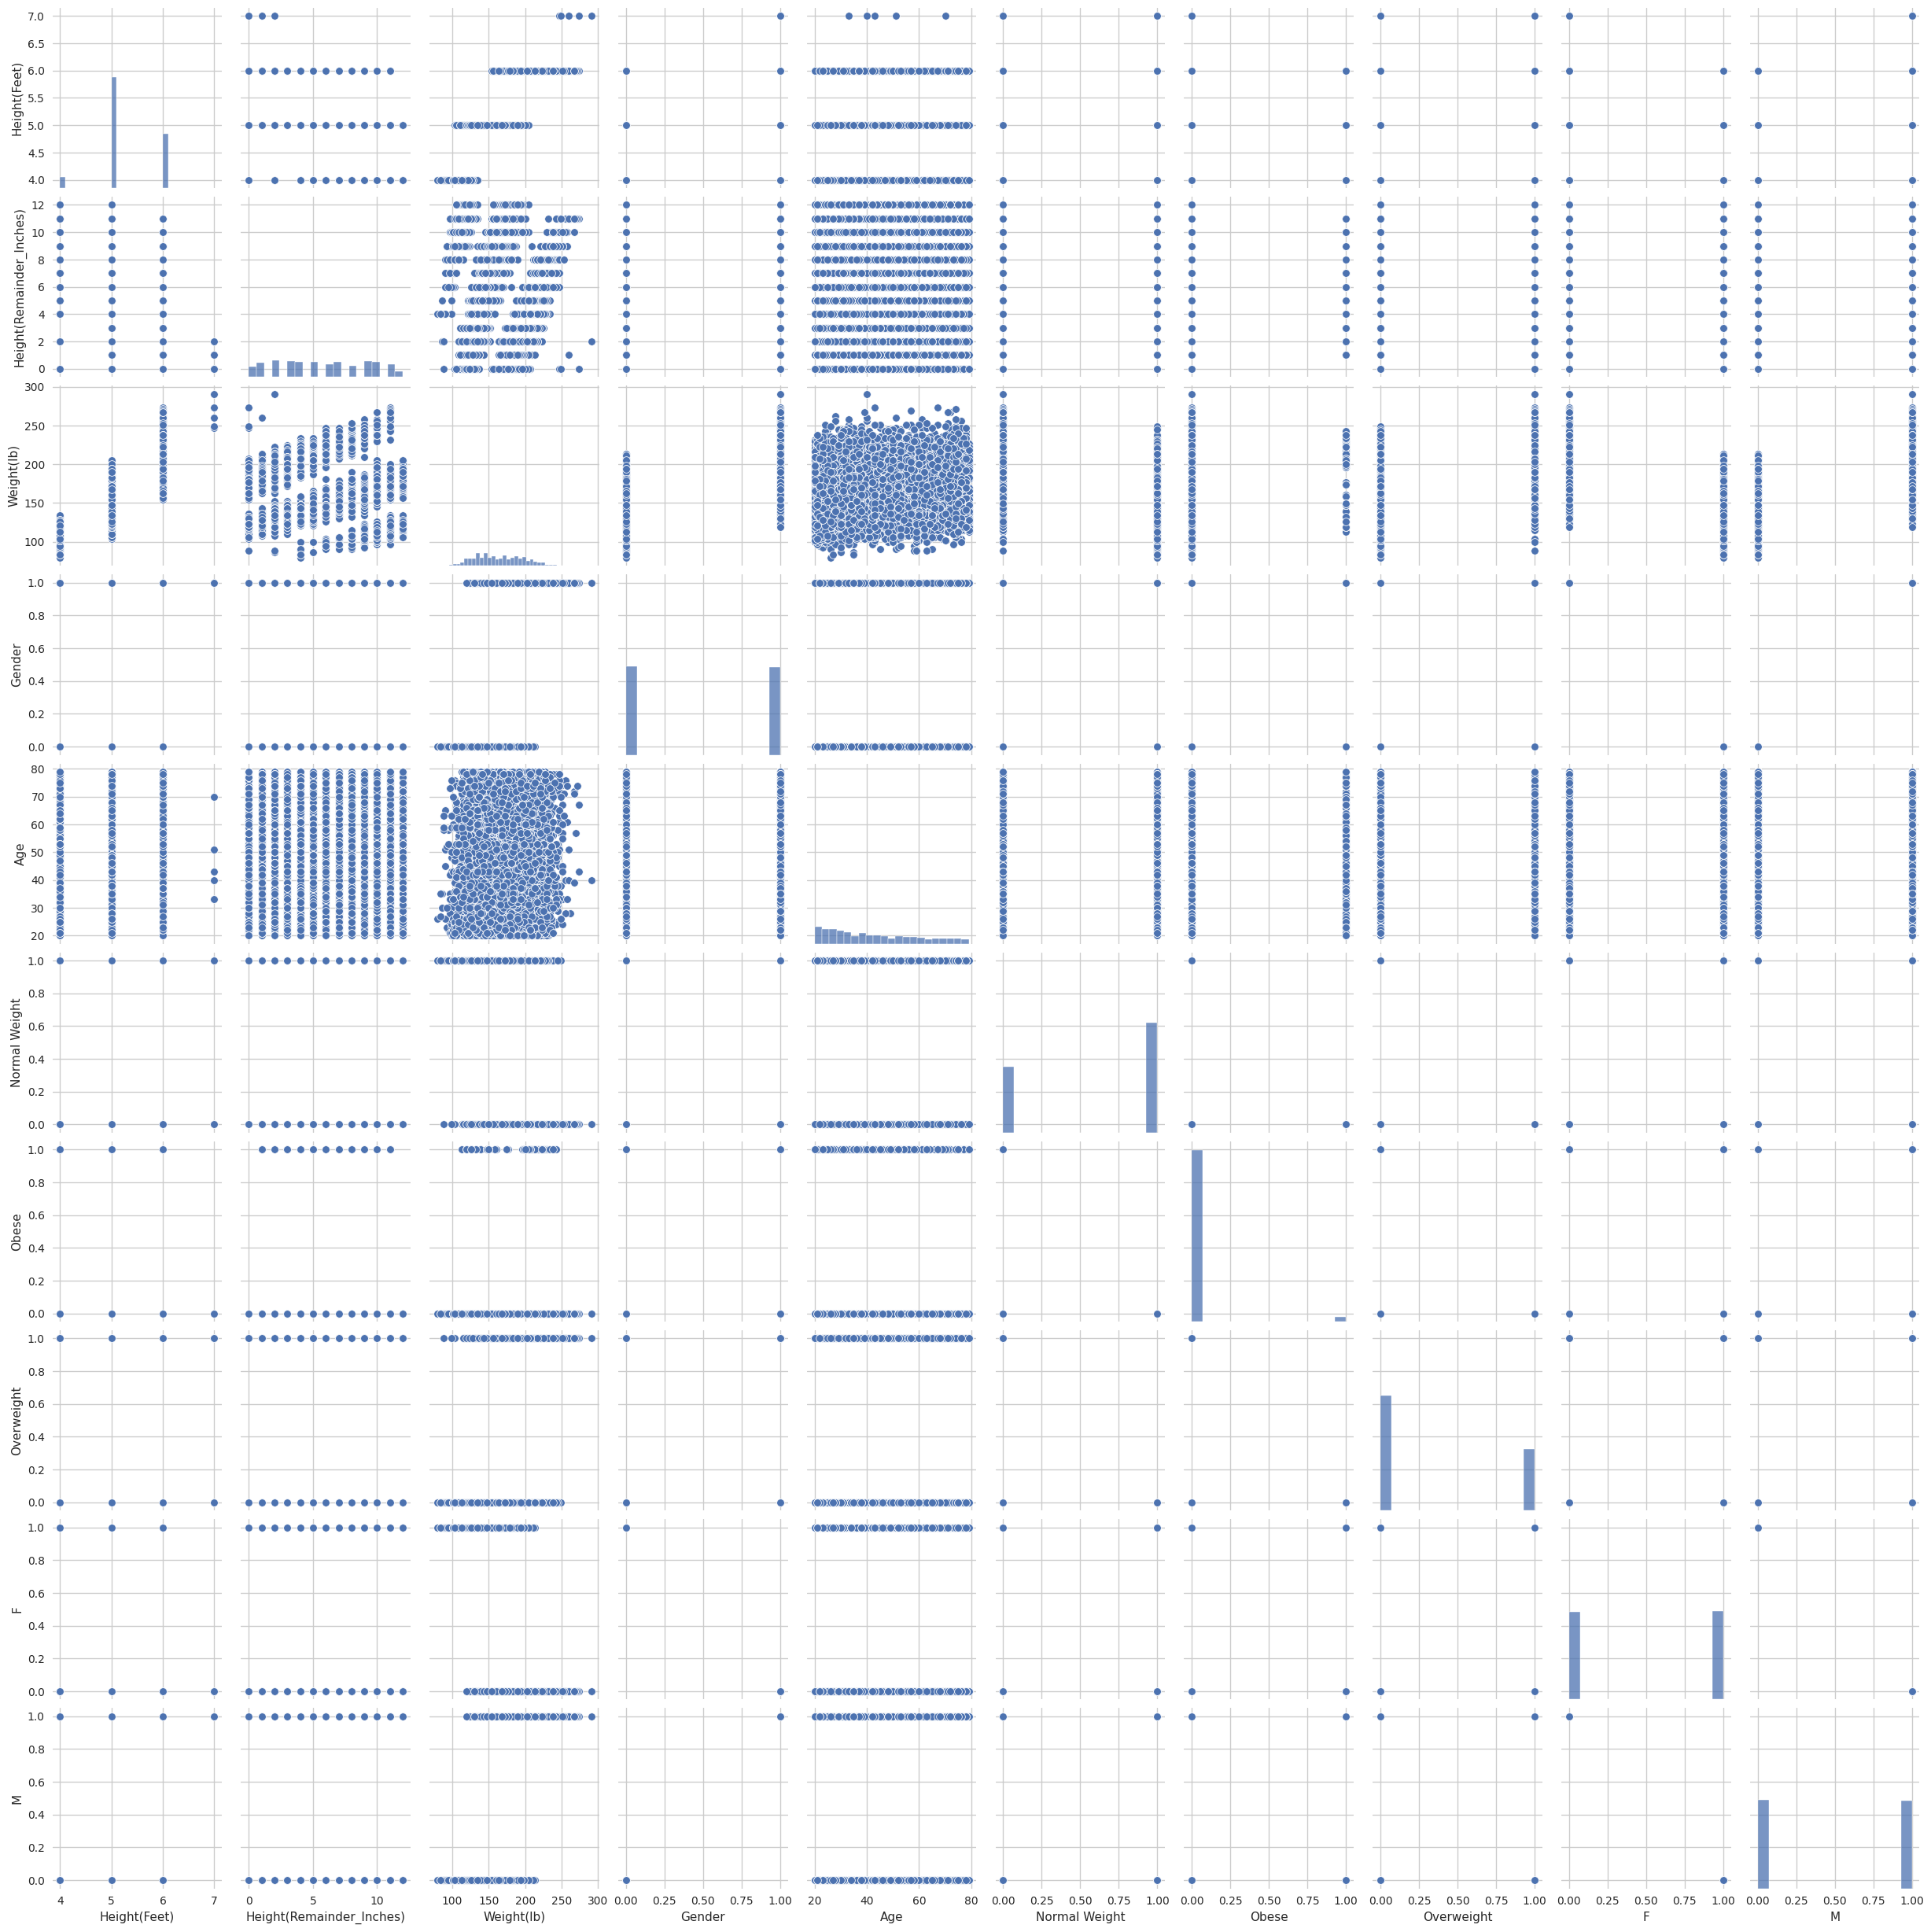

In [ ]:
fig4 = sbs.pairplot(new_Range2)

In [ ]:
# main factor modeling

In [ ]:
arr = np.array([1,2,3])

In [ ]:
arr.shape

(3,)

In [ ]:
arr

array([1, 2, 3])

In [ ]:
arr2= arr.reshape(-1,1)

In [ ]:
arr2

array([[1],
       [2],
       [3]])

In [ ]:
major_factors = new_Range1#.to_numpy()

In [ ]:
major_factors # multivariated x

,Exercise_Duration,Body_Temperature(F),BPM
0,26.0,105.6,107.0
1,7.0,103.3,88.0
2,7.0,103.3,86.0
3,17.0,104.0,99.0
4,9.0,102.7,88.0
...,...,...,...
7495,22.0,105.1,104.0
7496,20.0,105.3,104.0
7497,8.0,103.1,90.0
7498,12.0,104.4,97.0


In [ ]:
y1 = label4

In [ ]:
y1 # y Value of y Class

0       166.0
1        33.0
2        23.0
3        91.0
4        32.0
        ...  
7495    151.0
7496    114.0
7497     41.0
7498     57.0
7499     59.0
Name: Calories_Burned, Length: 7500, dtype: float64

In [ ]:
# Additional EDA

In [ ]:
new_label3_2 , new_test

(      Exercise_Duration  Body_Temperature(F)    BPM  Height(Feet)  \
 0                  26.0                105.6  107.0           5.0   
 1                   7.0                103.3   88.0           6.0   
 2                   7.0                103.3   86.0           6.0   
 3                  17.0                104.0   99.0           5.0   
 4                   9.0                102.7   88.0           5.0   
 ...                 ...                  ...    ...           ...   
 7495               22.0                105.1  104.0           4.0   
 7496               20.0                105.3  104.0           5.0   
 7497                8.0                103.1   90.0           6.0   
 7498               12.0                104.4   97.0           5.0   
 7499               16.0                104.9   91.0           5.0   
 
       Height(Remainder_Inches)  Weight(lb)  Weight_Status  Gender  Age  \
 0                          9.0       154.3  Normal Weight       0   45   
 1      

In [ ]:
new_label3_2['BPM'].max() # 69~ 128 , Usually People in sampling works Between Only low- and moderate-intensity exercise. (Possiblity to divide Columns with 2 ways)

128.0

In [ ]:
new_label3_2['exercise_strengh'] = 0

In [ ]:
new_label3_2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,0,45,1,0,0,1,0,0
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,1,50,0,0,1,0,1,0
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,1,29,0,0,1,0,1,0
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,0,33,1,0,0,1,0,0
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,1,38,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,0,75,1,0,0,1,0,0
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,0,21,1,0,0,1,0,0
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,1,57,0,0,1,0,1,0
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,1,35,0,0,1,0,1,0


In [ ]:
new_test['exercise_strengh'] = 0

In [ ]:
new_test

In [ ]:
new_test['exercise_strengh'].max()

1.6

In [ ]:
#new_label3_5.loc[new_label3_5['BPM'] <= 121, 'exercise_strengh'] = 'low'
#new_label3_5.loc[new_label3_5['low'] <= 121, 'exercise_strengh'] = 'low'
new_label3_2.loc[new_label3_2['BPM'] <= 121, 'exercise_strengh'] = 1.4


In [ ]:
#new_test.loc[new_test['BPM'] <= 121, 'exercise_strengh'] = 'low'
new_test.loc[new_test['BPM'] <= 121, 'exercise_strengh'] = 1.4

In [ ]:
#new_label3_5.loc[(new_label3_5['BPM'] > 121) & (new_label3_5['BPM'] <= 145), 'exercise_strengh'] = 'mid'
new_label3_2.loc[(new_label3_2['BPM'] > 121) & (new_label3_2['BPM'] <= 145), 'exercise_strengh'] = 1.6

In [ ]:
#new_test.loc[(new_test['BPM'] > 121) & (new_test['BPM'] <= 145), 'exercise_strengh'] = 'mid'
new_test.loc[(new_test['BPM'] > 121) & (new_test['BPM'] <= 145), 'exercise_strengh'] = 1.6

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4


In [ ]:
new_label3_2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,0,45,1,0,0,1,0,1.4
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,1,50,0,0,1,0,1,1.4
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,1,29,0,0,1,0,1,1.4
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,0,33,1,0,0,1,0,1.4
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,1,38,1,0,0,0,1,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,0,75,1,0,0,1,0,1.4
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,0,21,1,0,0,1,0,1.4
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,1,57,0,0,1,0,1,1.4
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,1,35,0,0,1,0,1,1.4


In [ ]:
new_label3_2['exercise_strengh'].max()

1.6

In [ ]:
new_test.max()

ID                          TEST_7499
Exercise_Duration                30.0
Body_Temperature(F)             106.7
BPM                             123.0
Height(Feet)                      7.0
Height(Remainder_Inches)         12.0
Weight(lb)                      282.2
Gender                              1
Age                                79
Normal Weight                       1
Obese                               1
Overweight                          1
F                                   1
M                                   1
exercise_strengh                  1.6
dtype: object

In [ ]:
# Created a Column for formula 1 .

In [ ]:
new_label3_2['estimates_cal_1'] = 0
new_test['estimates_cal_1'] = 0

In [ ]:
new_label3_2['estimates_2_M_BMR'] = 0
new_test['estimates_2_M_BMR'] = 0

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,0,0
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,0,0
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,0,0
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,0,0
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,0,0
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,0,0
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,0,0
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,0,0


In [ ]:
new_label3_6 = new_label3_5.drop(['estimates_cal_2','estimates_cal_3_M_BMR_T_CAL', 'estimates_cal_3_F_BMR_T_CAL', 'estimates_cal_2_male', 'estimates_cal_2_female'],axis=1)

AttributeError: ignored

In [ ]:
new_label3_2['estimates_2_F_BMR'] = 0
new_test['estimates_2_F_BMR'] = 0

In [ ]:
new_label3_2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,0,45,1,0,0,1,0,1.4,0,0,0
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,1,50,0,0,1,0,1,1.4,0,0,0
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,1,29,0,0,1,0,1,1.4,0,0,0
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,0,33,1,0,0,1,0,1.4,0,0,0
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,1,38,1,0,0,0,1,1.4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,0,75,1,0,0,1,0,1.4,0,0,0
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,0,21,1,0,0,1,0,1.4,0,0,0
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,1,57,0,0,1,0,1,1.4,0,0,0
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,1,35,0,0,1,0,1,1.4,0,0,0


In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,0,0,0
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,0,0,0
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,0,0,0
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,0,0,0
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,0,0,0
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,0,0,0
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,0,0,0
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,0,0,0


In [ ]:
new_label3_2['estimates_cal_3_M_BMR_T_CAL'] = 0

In [ ]:
new_label3_2['estimates_cal_3_F_BMR_T_CAL'] = 0

In [ ]:
new_label3_5

In [ ]:
new_label3_2['estimates_cal_1'] = new_label3_2['Exercise_Duration'] * new_label3_2['exercise_strengh'] # Resolving formula 1 .

In [ ]:
new_test['estimates_cal_1'] = new_test['Exercise_Duration'] * new_test['exercise_strengh'] # Resolving formula 1 .

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0,0
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,0,0
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,0,0
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0,0
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0,0
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0,0
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,0,0
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,0,0


In [ ]:
new_label3_2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,0,45,1,0,0,1,0,1.4,36.4,0,0
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,1,50,0,0,1,0,1,1.4,9.8,0,0
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,1,29,0,0,1,0,1,1.4,9.8,0,0
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,0,33,1,0,0,1,0,1.4,23.8,0,0
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,1,38,1,0,0,0,1,1.4,12.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,0,75,1,0,0,1,0,1.4,30.8,0,0
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,0,21,1,0,0,1,0,1.4,28.0,0,0
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,1,57,0,0,1,0,1,1.4,11.2,0,0
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,1,35,0,0,1,0,1,1.4,16.8,0,0


In [ ]:
new_label3_7 = new_label3_6.drop(['estimates_cal_2', 'estimates_cal_3','estimates_cal_2_male','estimates_cal_2_female'],axis=1)

In [ ]:
new_label3_7

In [ ]:
new_label3_5['estimates_cal_3_M_BMR_T_CAL'] = new_label3_5['estimates_2_M_BMR'] * new_label3_5['exercise_strengh']

In [ ]:
new_label3_5['estimates_cal_3_F_BMR_T_CAL'] = new_label3_5['estimates_2_F_BMR'] * new_label3_5['exercise_strengh']

In [ ]:
new_label3_5

In [ ]:
new_label3_7 = new_label3_2.round(1)

In [ ]:
new_test2 = new_test2.round(1)

In [ ]:
new_label3_7

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,26.0,106.0,107.0,5.0,9.0,154.0,0,45,1,0,0,1,0,1.0,36.0,0.0,21.0,0.0,540.0
1,7.0,103.0,88.0,6.0,6.0,225.0,1,50,0,0,1,0,1,1.0,10.0,13.0,0.0,92.0,0.0
2,7.0,103.0,86.0,6.0,3.0,218.0,1,29,0,0,1,0,1,1.0,10.0,12.0,0.0,81.0,0.0
3,17.0,104.0,99.0,5.0,6.0,148.0,0,33,1,0,0,1,0,1.0,24.0,0.0,19.0,0.0,317.0
4,9.0,103.0,88.0,5.0,10.0,170.0,1,38,1,0,0,0,1,1.0,13.0,10.0,0.0,90.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.0,104.0,4.0,10.0,112.0,0,75,1,0,0,1,0,1.0,31.0,0.0,20.0,0.0,435.0
7496,20.0,105.0,104.0,5.0,8.0,148.0,0,21,1,0,0,1,0,1.0,28.0,0.0,19.0,0.0,377.0
7497,8.0,103.0,90.0,6.0,2.0,203.0,1,57,0,0,1,0,1,1.0,11.0,13.0,0.0,102.0,0.0
7498,12.0,104.0,97.0,5.0,9.0,168.0,1,35,0,0,1,0,1,1.0,17.0,11.0,0.0,133.0,0.0


In [ ]:
new_test2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0.0,18.9,0.0,490.7
1,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,14.0,0.0,406.2,0.0
2,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,11.3,0.0,123.9,0.0
3,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0.0,21.1,0.0,505.5
4,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,14.6,0.0,422.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0.0,21.8,0.0,609.0
7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0.0,20.7,0.0,82.8
7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,9.7,0.0,231.9,0.0
7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,8.1,0.0,64.4,0.0


In [ ]:
new_label3_7['exercise_strengh'].max()  # new_label3_7 , new_label3_10 used

In [ ]:
# Feature Importance ReSelected with Columns

In [ ]:
new_label3_7

In [ ]:
new_label3_10 = new_label3_7[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','estimates_cal_1','estimates_2_M_BMR','estimates_2_F_BMR','estimates_cal_2_male_TDEE','estimates_cal_2_female_TDEE']]

In [ ]:
new_label3_10

In [ ]:
new_label3_11 = new_label3_7[['Exercise_Duration','Body_Temperature(F)','BPM','Weight(lb)','Age','estimates_cal_1','estimates_cal_2_male_TDEE','estimates_cal_2_female_TDEE']]

In [ ]:
new_label3_11

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X1 = scaler.fit_transform(new_label3_2)

In [ ]:
X2 = scaler.fit_transform(new_label3_10)

In [ ]:
X3 = scaler.fit_transform(new_label3_11)

In [ ]:
X1.keys()

In [ ]:
new_label3_7.keys()

In [ ]:
new_label3_10.keys()

In [ ]:
new_label3_11.keys()

In [ ]:
y1 , label4

In [ ]:
fig4 = sbs.pairplot(new_label3_7)

In [ ]:
fig5 = sbs.pairplot(new_label3_10)

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
submission = ss

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_label3_7, y1, test_size=0.33, random_state=42)

In [ ]:
X_train

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
3151,8.0,104.0,83.0,5.0,6.0,159.0,1,77,0,0,1,0,1,1.0,11.0,11.0,0.0,85.0,0.0
4019,15.0,104.0,95.0,5.0,3.0,134.0,0,57,1,0,0,1,0,1.0,21.0,0.0,19.0,0.0,279.0
4194,20.0,105.0,92.0,5.0,1.0,115.0,0,28,1,0,0,1,0,1.0,28.0,0.0,16.0,0.0,316.0
1825,26.0,106.0,105.0,5.0,1.0,119.0,0,39,1,0,0,1,0,1.0,36.0,0.0,18.0,0.0,481.0
7363,11.0,104.0,79.0,5.0,2.0,128.0,0,35,1,0,0,1,0,1.0,15.0,0.0,15.0,0.0,163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2.0,100.0,82.0,6.0,7.0,214.0,1,33,1,0,0,0,1,1.0,3.0,11.0,0.0,22.0,0.0
5226,10.0,104.0,87.0,5.0,3.0,128.0,0,30,1,0,0,1,0,1.0,14.0,0.0,16.0,0.0,158.0
5390,11.0,104.0,80.0,6.0,1.0,198.0,1,37,0,0,1,0,1,1.0,15.0,10.0,0.0,111.0,0.0
860,11.0,104.0,84.0,5.0,3.0,139.0,0,53,1,0,0,1,0,1.0,15.0,0.0,17.0,0.0,186.0


In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
#model = lasso_reg.predict(new_test) # new_test = test + concatensatoin
# Reduce error to 4
#  Lasso was Best ################ Data was processed by new_label3_7 ###########  4.122540674000994

Lasso(alpha=0.1)

In [ ]:
model = lasso_reg.predict(new_test2)

In [ ]:
model.round(0)

array([166., 195.,  54., ..., 108.,  29., 158.])

In [ ]:
pd.DataFrame(model)

In [ ]:
submission['Calories_Burned'] = model

In [ ]:
submission.to_csv('sample_0435_0342.csv', index=False)

In [ ]:
mean_absolute_error(new_test2,model)

ValueError: ignored

In [ ]:
MSE = mean_squared_error(new_test2, model)
np.sqrt(MSE)

ValueError: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_label3_10, y1, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
model2 = ridge_reg.predict(X_test)

In [ ]:
MSE = mean_squared_error(y_test, model2)
np.sqrt(MSE)

In [ ]:
mean_absolute_error(y_test,model2) ######################### new_label3_10 Data can process up to 4.120950113860978

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(new_label3_10, y1, test_size=0.33, random_state=42)

In [ ]:
y_test

In [ ]:
# Elastic-Net
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X_train, y_train)
model3 = elastic_reg.predict(X_test)

In [ ]:
mean_absolute_error(y_test,model2) # Checkout amounts

In [ ]:
MSE = mean_squared_error(y_test, model3)
np.sqrt(MSE)

In [ ]:
#submission.to_csv('sample_0554.csv', index=False)

In [ ]:
# LASSO
fit = Lasso(alpha=0.5, fit_intercept=True, normalize=True, random_state=123).fit(X_train, y_train)
pred_tr = fit.predict(X_train)
pred_te = fit.predict(X_test)

In [ ]:
X_training , X_testing , y_training , y_testing = train_test_split(new_label3_10, y1, test_size=0.2 , random_state=0)

In [ ]:
y1

In [ ]:
new_label3_5['BPM']

In [ ]:
# BMR

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0,0
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,0,0
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,0,0
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0,0
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0,0
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0,0
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,0,0
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,0,0


In [ ]:
new_label3_2['estimates_2_M_BMR'] =  new_label3_2['M'] * ((-55.0969 + (0.6309 * new_label3_2['BPM'] ) + (0.1988 * new_label3_2['Weight(lb)']) + (0.2017 * new_label3_2['Age'])) / 4.184)

In [ ]:
new_test['estimates_2_M_BMR'] =  new_test['M'] * ((-55.0969 + (0.6309 * new_test['BPM'] ) + (0.1988 * new_test['Weight(lb)']) + (0.2017 * new_test['Age'])) / 4.184)

In [ ]:
new_label3_2['estimates_2_F_BMR'] = new_label3_2['F'] *((-20.4022 + (0.6309 * new_label3_2['BPM'] ) + (0.1988 * new_label3_2['Weight(lb)']) + (0.2017 * new_label3_2['Age'])) / 4.184 )

In [ ]:
new_test['estimates_2_F_BMR'] = new_test['F'] *((-20.4022 + (0.6309 * new_label3_2['BPM'] ) + (0.1988 * new_test['Weight(lb)']) + (0.2017 * new_test['Age'])) / 4.184 )

In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0.000000,18.872629
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,14.008274,0.000000
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,11.266477,0.000000
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0.000000,21.061415
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,14.570784,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0.000000,21.750425
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0.000000,20.706095
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,9.664359,0.000000
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,8.051625,0.000000


In [ ]:
new_label3_2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,0,45,1,0,0,1,0,1.4,36.4,0.000000,20.758948,0
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,1,50,0,0,1,0,1,1.4,9.8,13.197280,0.000000,0
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,1,29,0,0,1,0,1,1.4,9.8,11.569751,0.000000,0
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,0,33,1,0,0,1,0,1.4,23.8,0.000000,18.660554,0
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,1,38,1,0,0,0,1,1.4,12.6,10.000750,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,0,75,1,0,0,1,0,1.4,30.8,0.000000,19.761955,0
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,0,21,1,0,0,1,0,1.4,28.0,0.000000,18.836009,0
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,1,57,0,0,1,0,1,1.4,11.2,12.786243,0.000000,0
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,1,35,0,0,1,0,1,1.4,16.8,11.108695,0.000000,0


In [ ]:
new_label3_2['estimates_cal_2_male_TDEE'] = 0
new_test['estimates_cal_2_male_TDEE'] = 0

In [ ]:
new_label3_2['estimates_cal_2_female_TDEE'] = 0
new_test['estimates_cal_2_female_TDEE'] = 0

In [ ]:
new_label3_6

In [ ]:
new_label3_2['estimates_cal_2_male_TDEE'] = new_label3_2['Exercise_Duration'] * new_label3_2['estimates_2_M_BMR']
new_test['estimates_cal_2_male_TDEE'] = new_test['Exercise_Duration'] * new_test['estimates_2_M_BMR']

In [ ]:
new_label3_2['estimates_cal_2_female_TDEE'] = new_label3_2['Exercise_Duration'] * new_label3_2['estimates_2_F_BMR']
new_test['estimates_cal_2_female_TDEE'] = new_test['Exercise_Duration'] * new_test['estimates_2_F_BMR']

In [ ]:
new_label3_2

,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,26.0,105.6,107.0,5.0,9.0,154.3,Normal Weight,0,45,1,0,0,1,0,1.4,36.4,0.000000,20.758948,0.000000,539.732658
1,7.0,103.3,88.0,6.0,6.0,224.9,Overweight,1,50,0,0,1,0,1,1.4,9.8,13.197280,0.000000,92.380961,0.000000
2,7.0,103.3,86.0,6.0,3.0,218.3,Overweight,1,29,0,0,1,0,1,1.4,9.8,11.569751,0.000000,80.988260,0.000000
3,17.0,104.0,99.0,5.0,6.0,147.7,Normal Weight,0,33,1,0,0,1,0,1.4,23.8,0.000000,18.660554,0.000000,317.229426
4,9.0,102.7,88.0,5.0,10.0,169.8,Normal Weight,1,38,1,0,0,0,1,1.4,12.6,10.000750,0.000000,90.006754,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,22.0,105.1,104.0,4.0,10.0,112.4,Normal Weight,0,75,1,0,0,1,0,1.4,30.8,0.000000,19.761955,0.000000,434.763011
7496,20.0,105.3,104.0,5.0,8.0,147.7,Normal Weight,0,21,1,0,0,1,0,1.4,28.0,0.000000,18.836009,0.000000,376.720172
7497,8.0,103.1,90.0,6.0,2.0,202.8,Overweight,1,57,0,0,1,0,1,1.4,11.2,12.786243,0.000000,102.289943,0.000000
7498,12.0,104.4,97.0,5.0,9.0,167.6,Overweight,1,35,0,0,1,0,1,1.4,16.8,11.108695,0.000000,133.304340,0.000000


In [ ]:
new_test

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Gender,Age,Normal Weight,Obese,Overweight,F,M,exercise_strengh,estimates_cal_1,estimates_2_M_BMR,estimates_2_F_BMR,estimates_cal_2_male_TDEE,estimates_cal_2_female_TDEE
0,TEST_0000,26.0,105.1,107.0,5.0,1.0,114.6,0,45,1,0,0,1,0,1.4,36.4,0.000000,18.872629,0.000000,490.688356
1,TEST_0001,29.0,104.9,111.0,6.0,2.0,198.4,1,21,0,0,1,0,1,1.4,40.6,14.008274,0.000000,406.239957,0.000000
2,TEST_0002,11.0,104.0,90.0,5.0,9.0,169.8,1,58,0,0,1,0,1,1.4,15.4,11.266477,0.000000,123.931248,0.000000
3,TEST_0003,24.0,105.4,108.0,5.0,12.0,196.2,1,35,1,0,0,1,0,1.4,33.6,0.000000,21.061415,0.000000,505.473958
4,TEST_0004,29.0,106.0,116.0,5.0,7.0,147.7,0,67,1,0,0,0,1,1.4,40.6,14.570784,0.000000,422.552734,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,TEST_7495,28.0,105.6,106.0,5.0,12.0,178.6,1,51,1,0,0,1,0,1.4,39.2,0.000000,21.750425,0.000000,609.011912
7496,TEST_7496,4.0,102.0,84.0,5.0,10.0,183.0,1,25,1,0,0,1,0,1.4,5.6,0.000000,20.706095,0.000000,82.824379
7497,TEST_7497,24.0,105.1,97.0,5.0,2.0,130.1,0,42,0,0,1,0,1,1.4,33.6,9.664359,0.000000,231.944627,0.000000
7498,TEST_7498,8.0,103.1,83.0,5.0,5.0,134.5,0,48,0,0,1,0,1,1.4,11.2,8.051625,0.000000,64.413002,0.000000


In [ ]:
# Created Column by formula 2

In [ ]:
# Created Column by formula 3

In [ ]:
############################## Modeling ###################################

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_label3_2, y1, test_size=0.333, random_state=42)

In [ ]:
# Ridge
fit = Ridge(alpha=0.5, fit_intercept=True, normalize=True, random_state=123).fit(x_train, y_train)
pred_tr = fit.predict(x_train)
pred_te = fit.predict(new_test)

NameError: ignored

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
transformed_X

In [ ]:
transformed_XV

In [ ]:
df_poly = pd.DataFrame(x_poly) # x_train
test_poly = pd.DataFrame(xv_poly) # x_test
#new_poly = pd.DataFrame(new_label3_10)

In [ ]:
# Create a lineat regression object
lin_reg = linear_model.LinearRegression()
############## Linear Regression error 7% ########################

In [ ]:

# Train the model using the training sets
lin_reg.fit(x_poly   ,y_train)

# x_train


In [ ]:
# Predicting
lin_model = lin_reg.predict(xv_poly) # x_test

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
r2_score(lin_model, y_test)

In [ ]:
r2_score(pred, y_test)

In [ ]:
mean_absolute_error(y_test,lin_model)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
np.sqrt(MSE)